PID Issues Notebook
* 26 October, 2024

Tutors:
* Dr. Christopher Lum
  * [University of Washington Webpage](http://faculty.washington.edu/lum/EducationalVideos.htm)
  * [Practical Implementation Issues with a PID Controller - YouTube](https://youtu.be/yr6om0e0oAQ?si=Sefee8Wn_NF5Xuda)
* Anthropic's AI Claude

The PID control algorithm is formally defined as:

```
u(t) = Kp * e(t) + Ki * ∫e(τ)dτ + Kd * de(t)/dt
```
We are going to examine issues associated with the derivative term of this equation

| Term/Symbol | Description |
|-------------|-------------|
| Derivative Term | Responds to the rate of change of error (`Kd * de(t)/dt`) |
| `Kd` | Derivative gain |
| `e(t)` | Error signal at time t |

# High Pass Filter High Level Summary

A high pass filter is a signal processing system that allows signals above a certain frequency (called the cutoff frequency) to pass through while attenuating signals below that frequency. Think of it as a frequency bouncer that lets through the "high notes" while reducing the "low notes."

Key characteristics of a high pass filter:

1. Cutoff Frequency (fc):
- The threshold frequency that defines where filtering begins
- Signals well above fc pass through with minimal change
- Signals below fc are progressively reduced in amplitude

2. Main Applications:
- Removing low-frequency noise or drift from signals
- Audio processing (reducing rumble, wind noise)
- AC coupling in electronics
- Image processing (edge detection, as edges contain high frequencies)
- Sensor data cleaning

3. Common Types:
- RC (Resistor-Capacitor) filters in electronics
- Digital FIR (Finite Impulse Response) filters
- Digital IIR (Infinite Impulse Response) filters
- Butterworth, Chebyshev, and other mathematical implementations

4. Key Parameters:
- Roll-off rate: How quickly the filter attenuates signals below cutoff
- Phase response: How the filter affects signal timing
- Order: Higher-order filters provide sharper cutoffs but introduce more complexity

5. Real-world Example:
Imagine you're recording someone speaking outdoors. A high pass filter can help remove the low-frequency rumble of wind noise while preserving the higher frequencies of the voice.



# High Pass Filter Technical Reference

## Basic Description
A high pass filter (HPF) is a signal processing system that allows signals above a certain frequency (cutoff frequency) to pass through while attenuating signals below that frequency. The filter's response is characterized by specific mathematical relationships between input and output signals.

## Key Equations

### Transfer Function (s-domain)
```
H(s) = s/(s + ωc)
```
where s is the complex frequency parameter and ωc is the cutoff frequency in radians/second.

### Frequency Response (magnitude)
```
|H(jω)| = ω/√(ω² + ωc²)
```
where ω is the input frequency and |H(jω)| is the magnitude response.

### Phase Response
```
φ(ω) = arctan(ωc/ω)
```
where φ(ω) is the phase shift at frequency ω.

### Cutoff Frequency Relationship
```
fc = ωc/(2π)
```
where fc is the cutoff frequency in Hz.

### First-Order RC Filter
```
fc = 1/(2πRC)
```
where R is resistance in ohms and C is capacitance in farads.

## Implementation Forms

### Digital Domain (Discrete Time)
First-order difference equation:
```
y[n] = α(x[n] - x[n-1]) + βy[n-1]
```
where:
- x[n] is the input signal
- y[n] is the output signal
- α and β are filter coefficients derived from cutoff frequency

## Glossary of Terms and Symbols

| Symbol/Term | Description | Units |
|------------|-------------|--------|
| ωc | Cutoff frequency | radians/second |
| fc | Cutoff frequency | Hertz (Hz) |
| s | Complex frequency parameter | - |
| ω | Angular frequency | radians/second |
| H(s) | Transfer function | - |
| φ(ω) | Phase response | radians |
| R | Resistance | Ohms (Ω) |
| C | Capacitance | Farads (F) |
| α | Filter coefficient (digital) | - |
| β | Filter coefficient (digital) | - |
| Roll-off | Rate of attenuation below cutoff | dB/octave |
| Order (n) | Filter complexity/steepness | dimensionless |

## Filter Characteristics by Order

| Order | Roll-off Rate | Phase Shift at fc |
|-------|--------------|-------------------|
| 1st | -20 dB/decade | -45° |
| 2nd | -40 dB/decade | -90° |
| 3rd | -60 dB/decade | -135° |
| 4th | -80 dB/decade | -180° |

## Applications and Key Features

1. Signal Processing Applications:
   - Noise reduction
   - AC coupling
   - Audio processing
   - Sensor data conditioning
   - Image edge detection

2. Performance Metrics:
   - Passband ripple (dB)
   - Stopband attenuation
   - Phase linearity
   - Group delay
   - Transition bandwidth

3. Common Implementation Types:
   - Butterworth (maximally flat magnitude)
   - Chebyshev (steeper roll-off, some ripple)
   - Bessel (linear phase response)
   - Elliptic (sharpest cutoff, ripple in both bands)

## Practical Considerations

1. Design Trade-offs:
   - Higher order → Sharper cutoff but more complexity
   - Steeper roll-off → Greater phase distortion
   - Lower cutoff → Longer settling time

2. Implementation Challenges:
   - Component tolerance in analog designs
   - Numerical precision in digital implementations
   - Phase response management
   - Group delay considerations

Note: This script requires numpy, matplotlib, and scipy libraries.
You can install them using: pip install numpy matplotlib scipy

Multi-Stage Signal Processing Visualization


Signal Processing Parameters:
Enter noise amplitude (0-1): 0.5
Enter filter cutoff frequency (0-10 Hz): 5


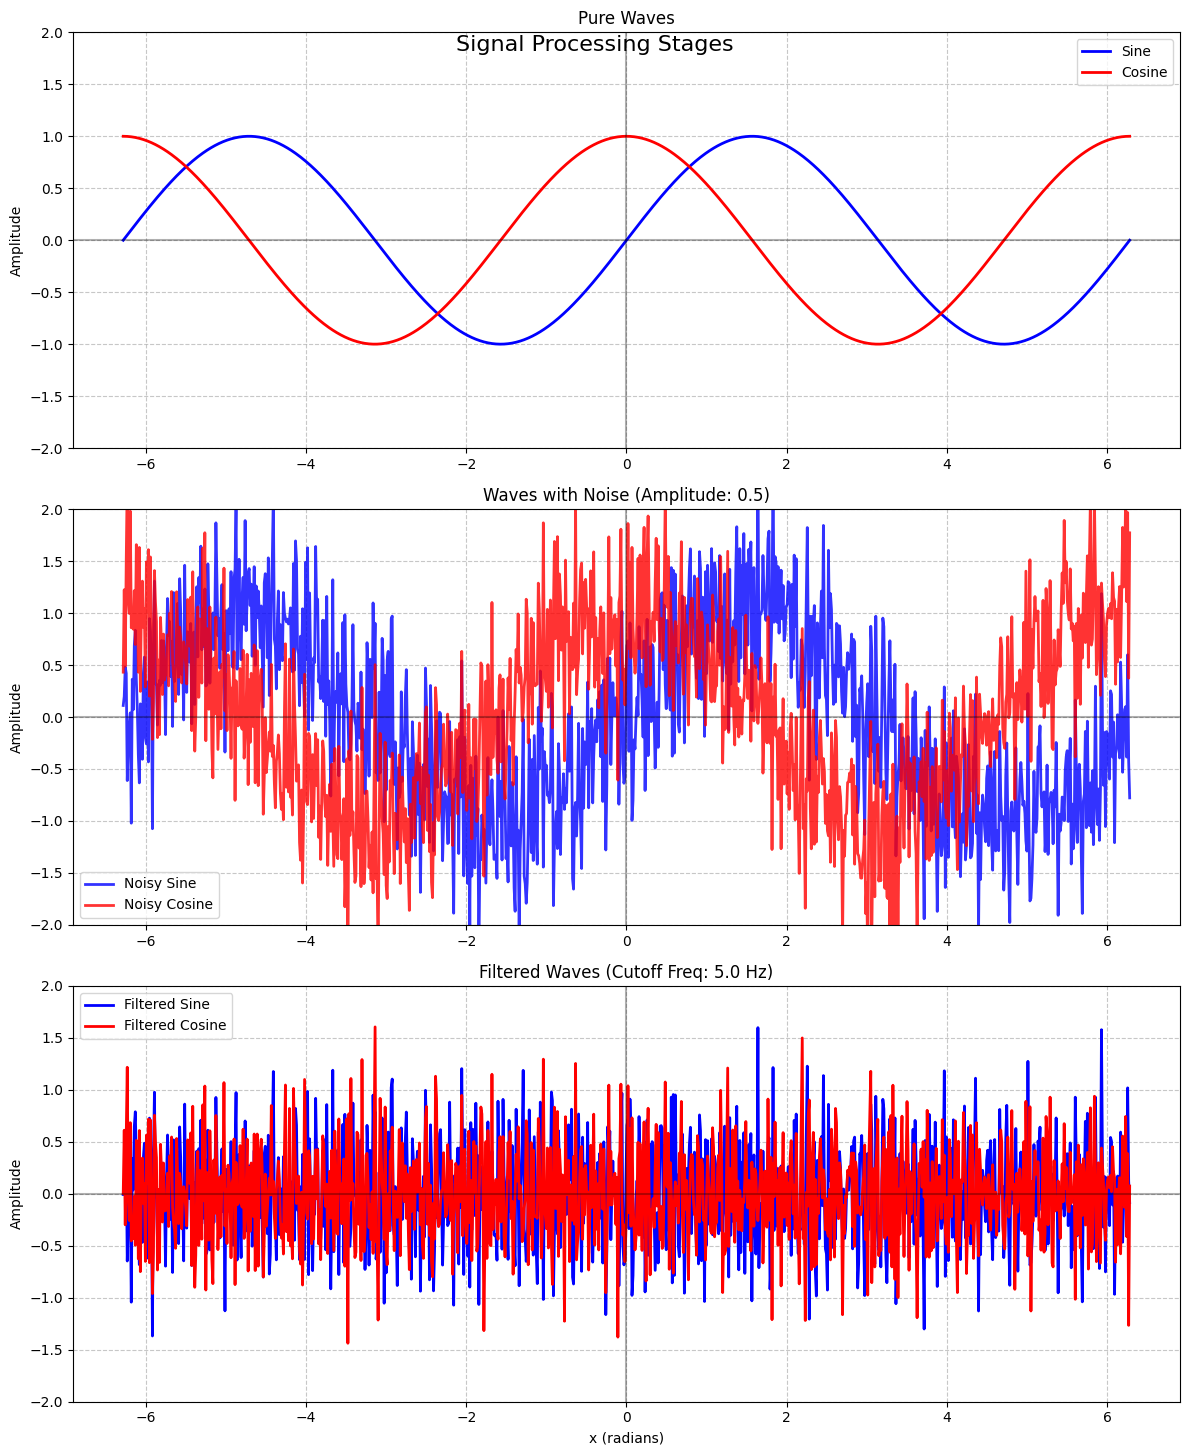

In [2]:
"""
Abstract:
This script visualizes three stages of signal processing: pure waves, waves with noise,
and filtered noisy waves. It uses subplots to display all stages simultaneously for
easy comparison. Users can customize noise levels and filter parameters. The script
demonstrates signal generation, noise addition, and frequency filtering using NumPy
for calculations and Matplotlib for visualization.

Author: Claude
Date: October 26, 2024
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sys

def get_float_input(prompt, min_val=0, max_val=1):
    """
    Helper function to get valid float input from user.

    Parameters:
    -----------
    prompt : str
        Question to ask user
    min_val : float
        Minimum acceptable value
    max_val : float
        Maximum acceptable value

    Returns:
    --------
    float : User's validated input
    """
    while True:
        try:
            value = float(input(prompt))
            if min_val <= value <= max_val:
                return value
            print(f"Please enter a value between {min_val} and {max_val}")
        except ValueError:
            print("Please enter a valid number")

def apply_high_pass_filter(signal_data, cutoff_freq, fs=100):
    """
    Apply a high pass filter to the input signal.

    Parameters:
    -----------
    signal_data : array
        Input signal to filter
    cutoff_freq : float
        Cutoff frequency in Hz
    fs : float
        Sampling frequency in Hz

    Returns:
    --------
    array : Filtered signal
    """
    nyquist = fs * 0.5
    normalized_cutoff_freq = cutoff_freq / nyquist
    b, a = signal.butter(4, normalized_cutoff_freq, btype='high')
    return signal.filtfilt(b, a, signal_data)

def plot_waves():
    """
    Main function to generate and display waves in three stages:
    1. Pure waves
    2. Waves with noise
    3. Filtered noisy waves
    """
    # Get user parameters
    print("\nSignal Processing Parameters:")
    noise_amplitude = get_float_input("Enter noise amplitude (0-1): ", 0, 1)
    cutoff_freq = get_float_input("Enter filter cutoff frequency (0-10 Hz): ", 0, 10)

    # Generate base data
    x = np.linspace(-2*np.pi, 2*np.pi, 1000)
    sine_wave = np.sin(x)
    cosine_wave = np.cos(x)

    # Generate noise
    noise_sine = np.random.normal(0, noise_amplitude, len(x))
    noise_cosine = np.random.normal(0, noise_amplitude, len(x))

    # Create noisy waves
    noisy_sine = sine_wave + noise_sine
    noisy_cosine = cosine_wave + noise_cosine

    # Apply filters
    filtered_sine = apply_high_pass_filter(noisy_sine, cutoff_freq)
    filtered_cosine = apply_high_pass_filter(noisy_cosine, cutoff_freq)

    # Create figure with three subplots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))
    fig.suptitle('Signal Processing Stages', fontsize=16, y=0.95)

    # Plot 1: Pure Waves
    ax1.plot(x, sine_wave, label='Sine', color='blue', linewidth=2)
    ax1.plot(x, cosine_wave, label='Cosine', color='red', linewidth=2)
    ax1.set_title('Pure Waves', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.set_ylabel('Amplitude', fontsize=10)
    ax1.legend(fontsize=10)
    ax1.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax1.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax1.set_ylim(-2, 2)

    # Plot 2: Noisy Waves
    ax2.plot(x, noisy_sine, label='Noisy Sine', color='blue', linewidth=2, alpha=0.8)
    ax2.plot(x, noisy_cosine, label='Noisy Cosine', color='red', linewidth=2, alpha=0.8)
    ax2.set_title(f'Waves with Noise (Amplitude: {noise_amplitude})', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.set_ylabel('Amplitude', fontsize=10)
    ax2.legend(fontsize=10)
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax2.set_ylim(-2, 2)

    # Plot 3: Filtered Waves
    ax3.plot(x, filtered_sine, label='Filtered Sine', color='blue', linewidth=2)
    ax3.plot(x, filtered_cosine, label='Filtered Cosine', color='red', linewidth=2)
    ax3.set_title(f'Filtered Waves (Cutoff Freq: {cutoff_freq} Hz)', fontsize=12)
    ax3.grid(True, linestyle='--', alpha=0.7)
    ax3.set_xlabel('x (radians)', fontsize=10)
    ax3.set_ylabel('Amplitude', fontsize=10)
    ax3.legend(fontsize=10)
    ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax3.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax3.set_ylim(-2, 2)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Additional required imports notification
    print("Note: This script requires numpy, matplotlib, and scipy libraries.")
    print("You can install them using: pip install numpy matplotlib scipy")
    print("\nMulti-Stage Signal Processing Visualization\n")

    try:
        plot_waves()
    except KeyboardInterrupt:
        print("\nProgram terminated by user.")
    except Exception as e:
        print(f"\nAn error occurred: {str(e)}")